In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

In [3]:
def fill_holes(imgBinary,kernel):
    '''
    孔洞填充
    :param imgBinary: 待处理二值图像
    :param kernel: 结构算子
    :return: 填充孔洞后的图像
    '''
    # 原图取补得到MASK图像
    mask = 255 - imgBinary
    # 构造Marker图像
    marker = np.zeros_like(imgBinary)
    marker[0, :] = 255
    marker[-1, :] = 255
    marker[:, 0] = 255
    marker[:, -1] = 255
    marker_0 = marker.copy()
    while True:
        marker_pre = marker
        dilation = cv2.dilate(marker, kernel)
        marker = np.min((dilation, mask), axis=0)
        if (marker_pre == marker).all():
            break
    dst = 255 - marker
    filling = dst - imgBinary
    return dst

In [46]:
def fill_onehole(imgBinary,kernel,m1,n1,m2,n2):
    '''
    孔洞填充
    :param imgBinary: 待处理二值图像
    :param kernel: 结构算子
    :m1,n1:左上角坐标
    :m2,n3:右下角坐标
    :return: 填充孔洞后的图像
    '''
    patch=imgBinary[m1:m2,n1:n2]
    # 原图取补得到MASK图像
    mask = 255 - patch
    # 构造Marker图像
    marker = np.zeros_like(patch)
    marker[0, :] = 255
    marker[-1, :] = 255
    marker[:, 0] = 255
    marker[:, -1] = 255
    marker_0 = marker.copy()
    while True:
        marker_pre = marker
        dilation = cv2.dilate(marker, kernel)
        marker = np.min((dilation, mask), axis=0)
        if (marker_pre == marker).all():
            break
    dst = 255 - marker
    result=imgBinary.copy()
    result[m1:m2,n1:n2]=dst
    return result

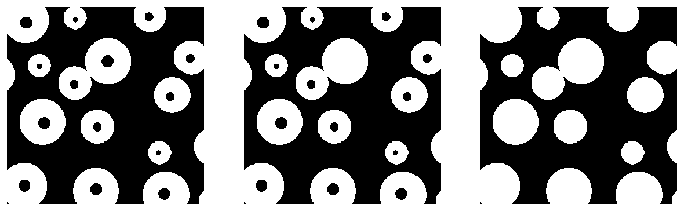

In [47]:
img = cv2.imread(r'..\img\hole.png',0)
_, img_binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernelSize=3
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(kernelSize,kernelSize))
img_fillOne=fill_onehole(img_binary,kernel,50,130,130,220)
img_fillAll=fill_holes(img_binary,kernel)

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.axis("off")
plt.imshow(img_binary,cmap="gray")
plt.subplot(1,3,2)
plt.axis("off")
plt.imshow(img_fillOne,cmap="gray")
plt.subplot(1,3,3)
plt.axis("off")
plt.imshow(img_fillAll,cmap="gray")
plt.show()  

In [34]:
# m,n=img_binary.shape
# print(m,n)
box =np.uint8(np.ones_like(img_binary)*255)     
img_ROI=img_binary[50:130,130:220]       #numpy数组的下标是[height,width,depth]
cv2.imshow("color image",img_binary)
cv2.waitKey(0)
cv2.imshow("ROI image",img_ROI)
cv2.waitKey(0)
cv2.destroyAllWindows()
